Tugas PCD Program Konvolusi Spasial Citra

In [4]:
# use virtual environment
# venv/Scripts/activate

# install library
# pip install matplotlib opencv-python numpy scipy

# import library
import cv2
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import convolve

# membaca file gambar
image = cv2.imread('rrqbb.webp', cv2.IMREAD_COLOR)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

(np.float64(-0.5), np.float64(799.5), np.float64(449.5), np.float64(-0.5))

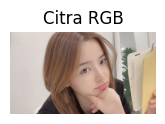

In [5]:
# Menampilkan file gambar (Citra RGB)
plt.subplot(2, 3, 1)
plt.imshow(image_rgb)
plt.title('Citra RGB')
plt.axis('off')

(np.float64(-0.5), np.float64(799.5), np.float64(449.5), np.float64(-0.5))

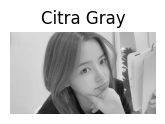

In [6]:
# Mengubah citra RGB menjadi grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Menampilkan gambar grayscale
plt.subplot(2, 3, 2)
plt.imshow(image_gray, cmap='gray')
plt.title('Citra Gray')
plt.axis('off')

Text(0.5, 1.0, 'Histogram Citra Gray')

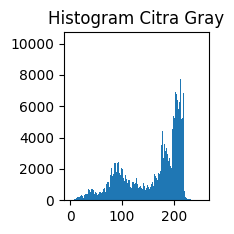

In [7]:
# Menampilkan histogram citra
plt.subplot(2, 3, 3)
plt.hist(image_gray.ravel(), bins=256, range=[0, 256])
plt.title('Histogram Citra Gray')

In [8]:
# Konvolusi spasial menggunakan 2 jenis kernel/mask/filter
# Kernel 1
kernel1 = np.array([[-1, -1, -1],
                    [-1,  8, -1],
                    [-1, -1, -1]])

# Kernel 2
kernel2 = np.array([[1,  2,  1],
                    [0,  0,  0],
                    [-1, -2, -1]])

# Melakukan konvolusi dengan kernel 1
convolved1 = convolve(image_gray, kernel1)

# Melakukan konvolusi dengan kernel 2
convolved2 = convolve(image_gray, kernel2)

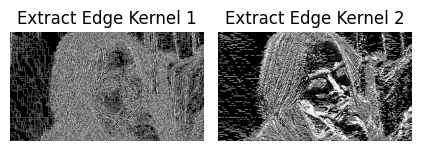

In [14]:
# Menampilkan hasil konvolusi dengan kernel 1
plt.subplot(2, 3, 4)
plt.imshow(convolved1, cmap='gray')
plt.title('Extract Edge Kernel 1')
plt.axis('off')

# Menampilkan hasil konvolusi dengan kernel 2
plt.subplot(2, 3, 5)
plt.imshow(convolved2, cmap='gray')
plt.title('Extract Edge Kernel 2')
plt.axis('off')

plt.tight_layout()
plt.show()